In [1]:
import os
os.chdir(os.path.join(os.getcwd(),".."))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.metrics import confusion_matrix, classification_report

from tqdm.notebook import tqdm
import yaml

In [5]:
from tasks.nn.classifiers import build_model, keras_classifier

# Load Dataset

In [6]:
digits_mnist = keras.datasets.mnist

In [7]:
(train_X, train_y), (test_X, test_y) = digits_mnist.load_data()

In [8]:
test_y[:3]

array([7, 2, 1], dtype=uint8)

In [9]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [10]:
test_y[:3]

array([7, 2, 1], dtype=uint8)

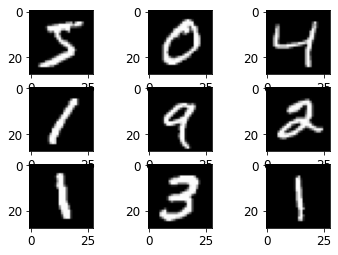

In [11]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [12]:
# reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

In [13]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    
    return train_norm, test_norm

In [14]:
# prepare pixel data
train_X, test_X = prep_pixels(train_X, test_X)

In [15]:
train_X.shape

(60000, 28, 28, 1)

In [16]:
test_X.shape

(10000, 28, 28, 1)

# Create Classifier

In [17]:
config_nn_path = os.path.join(os.getcwd(), "tasks", "project_configuration", "nn_tuning.yaml")
with open(config_nn_path, 'r') as stream:
    try:
        config_nn = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [18]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
keras.backend.clear_session()

In [20]:
# grid mode: "randomized", "gridsearch"
clf = keras_classifier(config=config_nn, clf_params=config_nn["clf_params"], 
                       param_grid=config_nn["param_distribs"], 
                       grid_mode="randomized") 

Classifier Parameters:
 {'epochs': 50, 'validation_split': 0.2, 'use_multiprocessing': True, 'shuffle': True, 'verbose': 1, 'build_fn': <function build_model at 0x7f99b9c26830>}


# Train the Classifier

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, History

In [22]:
callback_early_stopping = EarlyStopping(patience=20)

In [23]:
clf.fit(train_X, train_y, callbacks=[callback_early_stopping])

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 0.3511 - accuracy: 0.9010 - val_loss: 0.4823 - val_accuracy: 0.9239
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9609 - val_loss: 0.1623 - val_accuracy: 0.9654
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9730 - val_loss: 0.1023 - val_accuracy: 0.9753
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9780 - val_loss: 0.0894 - val_accuracy: 0.9785
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9831 - val_loss: 0.0818 - val_accuracy: 0.9794
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.9862 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0561 - accura

Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0541 - accuracy: 0.9884 - val_loss: 0.0777 - val_accuracy: 0.9786
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9908 - val_loss: 0.0726 - val_accuracy: 0.9800
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0427 - accuracy: 0.9923 - val_loss: 0.0697 - val_accuracy: 0.9812
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9935 - val_loss: 0.0672 - val_accuracy: 0.9820
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9948 - val_loss: 0.0669 - val_accuracy: 0.9812
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0320 - accuracy: 0.9952 - val_loss: 0.0648 - val_accuracy: 0.9818
Epoch 13/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9962 - val_loss: 0.0632 - val_accuracy: 0.9822
Ep

250/250 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9968 - val_loss: 0.0748 - val_accuracy: 0.9785
Epoch 14/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0246 - accuracy: 0.9978 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 15/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.9979 - val_loss: 0.0732 - val_accuracy: 0.9794
Epoch 16/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0205 - accuracy: 0.9984 - val_loss: 0.0719 - val_accuracy: 0.9796
Epoch 17/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9987 - val_loss: 0.0714 - val_accuracy: 0.9797
Epoch 18/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.9989 - val_loss: 0.0707 - val_accuracy: 0.9797
Epoch 19/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9992 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 20/50

125/125 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9952 - val_loss: 0.0670 - val_accuracy: 0.9824
Epoch 20/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9959 - val_loss: 0.0666 - val_accuracy: 0.9824
Epoch 21/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9957 - val_loss: 0.0658 - val_accuracy: 0.9826
Epoch 22/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9962 - val_loss: 0.0654 - val_accuracy: 0.9822
Epoch 23/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9967 - val_loss: 0.0638 - val_accuracy: 0.9826
Epoch 24/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9967 - val_loss: 0.0633 - val_accuracy: 0.9834
Epoch 25/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9972 - val_loss: 0.0630 - val_accuracy: 0.9834
Epoch 26/50

125/125 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9979 - val_loss: 0.0617 - val_accuracy: 0.9833
Epoch 26/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9980 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 27/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9984 - val_loss: 0.0610 - val_accuracy: 0.9837
Epoch 28/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9986 - val_loss: 0.0606 - val_accuracy: 0.9839
Epoch 29/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9988 - val_loss: 0.0598 - val_accuracy: 0.9837
Epoch 30/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9987 - val_loss: 0.0600 - val_accuracy: 0.9840
Epoch 31/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9991 - val_loss: 0.0591 - val_accuracy: 0.9845
Epoch 32/50

125/125 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9986 - val_loss: 0.0687 - val_accuracy: 0.9789
Epoch 32/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9987 - val_loss: 0.0684 - val_accuracy: 0.9794
Epoch 33/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9989 - val_loss: 0.0679 - val_accuracy: 0.9799
Epoch 34/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9989 - val_loss: 0.0677 - val_accuracy: 0.9794
Epoch 35/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9990 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 36/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9990 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 37/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9992 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 38/50

375/375 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9999 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 38/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9999 - val_loss: 0.0493 - val_accuracy: 0.9854
Epoch 39/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9851
Epoch 40/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 0.0491 - val_accuracy: 0.9854
Epoch 41/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 42/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9858
Epoch 43/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9853
Epoch 44/50

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f99b6542a90>,
                   param_distributions={'batch_size': [128, 256]}, verbose=2)

In [24]:
clf.best_params_

{'batch_size': 128}

In [25]:
clf.best_score_

0.9821999867757162

In [26]:
clf.best_estimator_

In [27]:
clf.score(test_X, test_y)

79/79 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9845


0.984499990940094

In [28]:
model = clf.best_estimator_.model
model

In [29]:
# evaluate model on test dataset
loss, acc = model.evaluate(test_X, test_y, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 1ms/step - loss: 0.0483 - accuracy: 0.9845
> 98.450


# Train and Evaluate the best Classifier

In [30]:
params = clf.best_params_

In [35]:
params

{'batch_size': 128}

In [31]:
keras.backend.clear_session()

In [32]:
model = build_model()

In [34]:
history = model.fit(train_X,
                    train_y,
                    validation_split=config_nn["clf_params"]["validation_split"],
                    use_multiprocessing=config_nn["clf_params"]["use_multiprocessing"],
                    shuffle=config_nn["clf_params"]["shuffle"],
                    epochs=config_nn["clf_params"]["epochs"],
                    verbose = config_nn["clf_params"]["verbose"], 
                    batch_size=params['batch_size'])

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.9151 - val_loss: 0.2693 - val_accuracy: 0.9461
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1300 - accuracy: 0.9664 - val_loss: 0.1142 - val_accuracy: 0.9700
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9755 - val_loss: 0.0936 - val_accuracy: 0.9753
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9811 - val_loss: 0.0848 - val_accuracy: 0.9778
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9849 - val_loss: 0.0783 - val_accuracy: 0.9793
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9872 - val_loss: 0.0748 - val_accuracy: 0.9795
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9897 - val_loss: 0.0704 - val_accuracy: 0.9802
Epoch 

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 375}

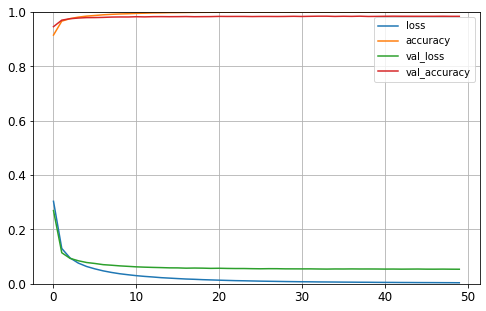

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
# evaluate model on test dataset
loss, acc = model.evaluate(test_X, test_y, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9854
> 98.540


In [39]:
predictions = np.argmax(model.predict(test_X, verbose=1), axis=-1)

313/313 [==============================] - 0s 724us/step


In [40]:
predictions.shape

(10000,)

In [41]:
predictions[:3]

array([7, 2, 1])

In [42]:
print(confusion_matrix(test_y, predictions))

[[ 975    0    1    0    0    1    1    1    0    1]
 [   0 1127    2    2    1    1    0    1    1    0]
 [   1    3 1016    0    2    0    2    6    2    0]
 [   0    0    4  995    0    5    0    2    3    1]
 [   0    0    2    0  971    0    2    0    0    7]
 [   2    0    0    8    0  878    3    1    0    0]
 [   3    3    0    0    2    3  943    0    4    0]
 [   0    4   10    0    0    1    0 1010    0    3]
 [   5    0    2    3    0    1    0    4  956    3]
 [   3    1    0    5    5    5    0    4    3  983]]


In [43]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

